In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# - 한셀안의 인쇄동작을 모두 수행
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# - matplotlib 초기 설정(한글 폰트 설정)
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
mpl.rc('font',size=16) # 전체 폰트크기 지정

# << 전국 월별 아파트거래 데이터 전처리>>
## [0] '아파트거래_월별2.xlsx' 파일 파악하기
### 전처리 할 내역들
1. 변경 전 주소나 신도시인 경우 빈란에 '-'로 표기되어 대부분 object타입으로 읽어와 '-'은 모두 누락처리하여 수치형 데이터로 변경해야 한다
2. 아래 그림처럼 지역1, 지역2의 빈칸엔 해당 도나 시명칭으로 채워넣어야 한다
3. 수원시 행정명칭을 수원특례시로 변경해야 한다
4. 지역2와 지역3 컬럼을 하나의 주소로 합치는 편집이 필요하다. 
5. 컬럼명의 년월표기명을 약식으로 편집이 필요하다.
6. 최종 완성된 df을 파일로 저장한다
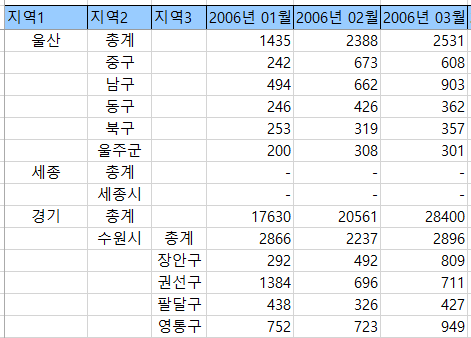

In [2]:
# [0] 파일 확인
df_apt = pd.read_excel('아파트거래_월별2.xlsx', header=10)
df_apt.info()
df_apt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Columns: 206 entries, 지역1 to 2022년 11월
dtypes: object(206)
memory usage: 479.7+ KB


,지역1,지역2,지역3,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,전국,총계,NaN,61675,80638,100342,85393,85190,77125,63979,...,62688,62391,74575,63769,60119,42595,51007,37727,39369,38186
1,서울,총계,NaN,7704,12717,17419,14919,16277,11574,8649,...,3571,3926,3508,4835,4168,4651,2739,1773,2087,2140
2,NaN,종로구,NaN,37,69,66,87,82,71,47,...,80,29,35,32,28,18,22,24,12,10
3,NaN,중구,NaN,155,199,168,258,134,88,78,...,220,35,35,59,35,279,293,20,19,21
4,NaN,용산구,NaN,406,294,423,394,415,270,168,...,135,149,92,129,51,28,28,24,23,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,NaN,(구)북제주군,NaN,5,8,13,2,6,4,-,...,-,-,-,-,-,-,-,-,-,-
294,NaN,(구)남제주군,NaN,4,5,10,2,21,2,-,...,-,-,-,-,-,-,-,-,-,-
295,제주,총계,NaN,-,-,-,-,-,-,124,...,378,416,426,579,360,264,513,321,291,230
296,NaN,제주시,NaN,-,-,-,-,-,-,111,...,202,290,335,477,256,194,457,268,172,153


## [1] df_apt에서 '-'를 누락처리하여 df변수에 대입하라
- 파일을 다시 읽어오거나 재편집하는 다양한 방법이 있다. 처리후 컬럼의 타입을 확인하라
- 다음 그림 참고(일부)
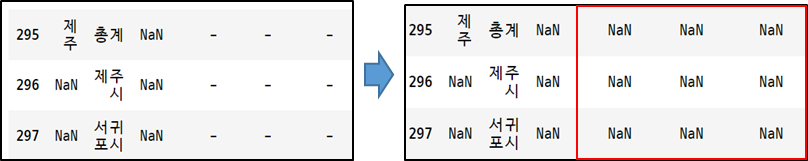

In [3]:
# [1] 코드 작성
df = df_apt.replace('-', np.nan)
df.info()
df.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Columns: 206 entries, 지역1 to 2022년 11월
dtypes: float64(203), object(3)
memory usage: 479.7+ KB


,지역1,지역2,지역3,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,전국,총계,NaN,61675.0,80638.0,100342.0,85393.0,85190.0,77125.0,63979.0,...,62688.0,62391.0,74575.0,63769.0,60119.0,42595.0,51007.0,37727.0,39369.0,38186.0
1,서울,총계,NaN,7704.0,12717.0,17419.0,14919.0,16277.0,11574.0,8649.0,...,3571.0,3926.0,3508.0,4835.0,4168.0,4651.0,2739.0,1773.0,2087.0,2140.0
2,NaN,종로구,NaN,37.0,69.0,66.0,87.0,82.0,71.0,47.0,...,80.0,29.0,35.0,32.0,28.0,18.0,22.0,24.0,12.0,10.0
3,NaN,중구,NaN,155.0,199.0,168.0,258.0,134.0,88.0,78.0,...,220.0,35.0,35.0,59.0,35.0,279.0,293.0,20.0,19.0,21.0
4,NaN,용산구,NaN,406.0,294.0,423.0,394.0,415.0,270.0,168.0,...,135.0,149.0,92.0,129.0,51.0,28.0,28.0,24.0,23.0,22.0
5,NaN,성동구,NaN,174.0,340.0,567.0,529.0,678.0,454.0,292.0,...,400.0,46.0,74.0,111.0,108.0,172.0,68.0,36.0,30.0,33.0


## [2]  df에서 '지역1'과  '지역2' 컬럼내 빈칸 채우기
### 예로 지역1 컬럼내 최초의 '서울' 뒤에 결측값을 '서울'값으로, 지역2 컬럼내 수원시도 뒤에 결측치를 수원시로 채운다
- 참고) fillna의 method방식에서 0축 방향, 전방값으로 채우기를 이용한다
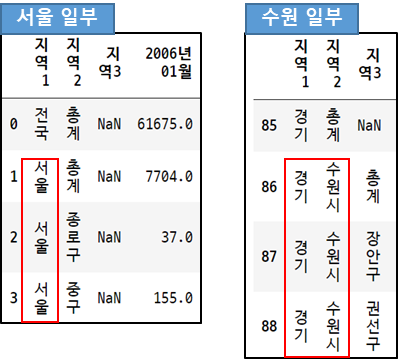

In [4]:
# [2] 코드 작성
df.loc[:,'지역1':'지역2'] = df.loc[:,'지역1':'지역2'].fillna(method='ffill')



# 확인
df.head() # 서울 일부
df.loc[85:91] # 수원 일부

,지역1,지역2,지역3,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,전국,총계,NaN,61675.0,80638.0,100342.0,85393.0,85190.0,77125.0,63979.0,...,62688.0,62391.0,74575.0,63769.0,60119.0,42595.0,51007.0,37727.0,39369.0,38186.0
1,서울,총계,NaN,7704.0,12717.0,17419.0,14919.0,16277.0,11574.0,8649.0,...,3571.0,3926.0,3508.0,4835.0,4168.0,4651.0,2739.0,1773.0,2087.0,2140.0
2,서울,종로구,NaN,37.0,69.0,66.0,87.0,82.0,71.0,47.0,...,80.0,29.0,35.0,32.0,28.0,18.0,22.0,24.0,12.0,10.0
3,서울,중구,NaN,155.0,199.0,168.0,258.0,134.0,88.0,78.0,...,220.0,35.0,35.0,59.0,35.0,279.0,293.0,20.0,19.0,21.0
4,서울,용산구,NaN,406.0,294.0,423.0,394.0,415.0,270.0,168.0,...,135.0,149.0,92.0,129.0,51.0,28.0,28.0,24.0,23.0,22.0


,지역1,지역2,지역3,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
85,경기,총계,NaN,17630.0,20561.0,28400.0,25277.0,27199.0,23842.0,18705.0,...,12852.0,10123.0,22184.0,16938.0,14277.0,8916.0,14628.0,7819.0,9384.0,8476.0
86,경기,수원시,총계,2866.0,2237.0,2896.0,2360.0,2757.0,2212.0,1677.0,...,431.0,622.0,639.0,815.0,1590.0,849.0,1041.0,473.0,730.0,487.0
87,경기,수원시,장안구,292.0,492.0,809.0,574.0,774.0,766.0,558.0,...,89.0,85.0,112.0,132.0,65.0,51.0,236.0,57.0,43.0,62.0
88,경기,수원시,권선구,1384.0,696.0,711.0,600.0,656.0,459.0,336.0,...,136.0,211.0,178.0,321.0,336.0,154.0,65.0,85.0,84.0,159.0
89,경기,수원시,팔달구,438.0,326.0,427.0,444.0,451.0,310.0,203.0,...,91.0,103.0,63.0,89.0,47.0,62.0,144.0,94.0,395.0,84.0
90,경기,수원시,영통구,752.0,723.0,949.0,742.0,876.0,677.0,580.0,...,115.0,223.0,286.0,273.0,1142.0,582.0,596.0,237.0,208.0,182.0
91,경기,성남시,총계,993.0,1161.0,1822.0,1358.0,1279.0,803.0,702.0,...,239.0,332.0,447.0,428.0,230.0,166.0,183.0,153.0,296.0,268.0


## [3] df에서 '지역2'컬럼내 '수원시'를 '수원특례시'로 변경하라
- 원본 df를 수정한다. 다음 그림 참고(일부)
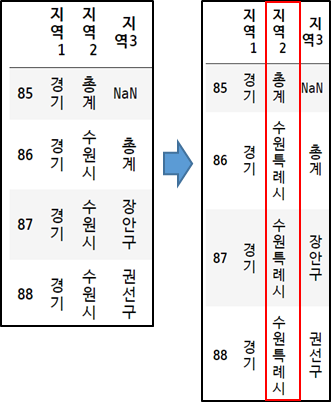

In [5]:
# [3] 코드 구현
df = df.replace({'지역2':{'수원시':'수원특례시'}})

# 확인
df.loc[85:91] # 수원 일부

,지역1,지역2,지역3,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
85,경기,총계,NaN,17630.0,20561.0,28400.0,25277.0,27199.0,23842.0,18705.0,...,12852.0,10123.0,22184.0,16938.0,14277.0,8916.0,14628.0,7819.0,9384.0,8476.0
86,경기,수원특례시,총계,2866.0,2237.0,2896.0,2360.0,2757.0,2212.0,1677.0,...,431.0,622.0,639.0,815.0,1590.0,849.0,1041.0,473.0,730.0,487.0
87,경기,수원특례시,장안구,292.0,492.0,809.0,574.0,774.0,766.0,558.0,...,89.0,85.0,112.0,132.0,65.0,51.0,236.0,57.0,43.0,62.0
88,경기,수원특례시,권선구,1384.0,696.0,711.0,600.0,656.0,459.0,336.0,...,136.0,211.0,178.0,321.0,336.0,154.0,65.0,85.0,84.0,159.0
89,경기,수원특례시,팔달구,438.0,326.0,427.0,444.0,451.0,310.0,203.0,...,91.0,103.0,63.0,89.0,47.0,62.0,144.0,94.0,395.0,84.0
90,경기,수원특례시,영통구,752.0,723.0,949.0,742.0,876.0,677.0,580.0,...,115.0,223.0,286.0,273.0,1142.0,582.0,596.0,237.0,208.0,182.0
91,경기,성남시,총계,993.0,1161.0,1822.0,1358.0,1279.0,803.0,702.0,...,239.0,332.0,447.0,428.0,230.0,166.0,183.0,153.0,296.0,268.0


## [4] df에서 '지역2'와 '지역3' 컬럼 합치기
### 지역2와 지역3을 합쳐 '지역2'컬럼에 갱신하고 '지역3'컬럼은 삭제한다
- 문자열과 문자열은 덧셈('+') 연산으로 연결할수 있다. 단 결측치값은 연산이 안된다. 즉 결측치를 빈문자열('')로 대체후 연산한다
- 다음 그림 참고(일부)
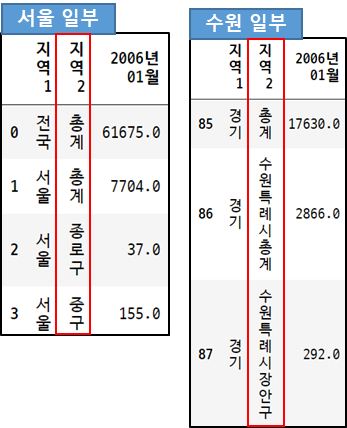

In [6]:
# [4] 코드 작성
df['지역2'] = df['지역2'] + df['지역3'].fillna('')
df.pop('지역3')
# 확인
df.head() # 서울 일부
df.loc[85:90] # 수원 일부

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
293    NaN
294    NaN
295    NaN
296    NaN
297    NaN
Name: 지역3, Length: 298, dtype: object

,지역1,지역2,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,2006년 08월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,전국,총계,61675.0,80638.0,100342.0,85393.0,85190.0,77125.0,63979.0,55837.0,...,62688.0,62391.0,74575.0,63769.0,60119.0,42595.0,51007.0,37727.0,39369.0,38186.0
1,서울,총계,7704.0,12717.0,17419.0,14919.0,16277.0,11574.0,8649.0,8463.0,...,3571.0,3926.0,3508.0,4835.0,4168.0,4651.0,2739.0,1773.0,2087.0,2140.0
2,서울,종로구,37.0,69.0,66.0,87.0,82.0,71.0,47.0,86.0,...,80.0,29.0,35.0,32.0,28.0,18.0,22.0,24.0,12.0,10.0
3,서울,중구,155.0,199.0,168.0,258.0,134.0,88.0,78.0,78.0,...,220.0,35.0,35.0,59.0,35.0,279.0,293.0,20.0,19.0,21.0
4,서울,용산구,406.0,294.0,423.0,394.0,415.0,270.0,168.0,199.0,...,135.0,149.0,92.0,129.0,51.0,28.0,28.0,24.0,23.0,22.0


,지역1,지역2,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,2006년 08월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
85,경기,총계,17630.0,20561.0,28400.0,25277.0,27199.0,23842.0,18705.0,17087.0,...,12852.0,10123.0,22184.0,16938.0,14277.0,8916.0,14628.0,7819.0,9384.0,8476.0
86,경기,수원특례시총계,2866.0,2237.0,2896.0,2360.0,2757.0,2212.0,1677.0,1884.0,...,431.0,622.0,639.0,815.0,1590.0,849.0,1041.0,473.0,730.0,487.0
87,경기,수원특례시장안구,292.0,492.0,809.0,574.0,774.0,766.0,558.0,578.0,...,89.0,85.0,112.0,132.0,65.0,51.0,236.0,57.0,43.0,62.0
88,경기,수원특례시권선구,1384.0,696.0,711.0,600.0,656.0,459.0,336.0,422.0,...,136.0,211.0,178.0,321.0,336.0,154.0,65.0,85.0,84.0,159.0
89,경기,수원특례시팔달구,438.0,326.0,427.0,444.0,451.0,310.0,203.0,256.0,...,91.0,103.0,63.0,89.0,47.0,62.0,144.0,94.0,395.0,84.0
90,경기,수원특례시영통구,752.0,723.0,949.0,742.0,876.0,677.0,580.0,628.0,...,115.0,223.0,286.0,273.0,1142.0,582.0,596.0,237.0,208.0,182.0


## [5] df의 컬럼명 편집하기
### 날짜로 구성된 컬럼명만 예로 '2022년 05월'을 '22_05'로 편집한다
- 다음 그림 참고(일부)
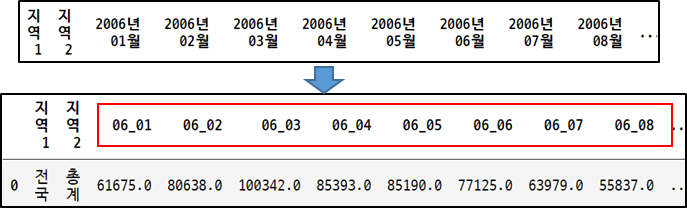

In [7]:
# [5] 코드 작성
def func(x):
    return x[2:4] + '_' + x[6:8] if x[0]=='2' else x

df.rename(columns = func, inplace = True)
df

,지역1,지역2,06_01,06_02,06_03,06_04,06_05,06_06,06_07,06_08,...,22_02,22_03,22_04,22_05,22_06,22_07,22_08,22_09,22_10,22_11
0,전국,총계,61675.0,80638.0,100342.0,85393.0,85190.0,77125.0,63979.0,55837.0,...,62688.0,62391.0,74575.0,63769.0,60119.0,42595.0,51007.0,37727.0,39369.0,38186.0
1,서울,총계,7704.0,12717.0,17419.0,14919.0,16277.0,11574.0,8649.0,8463.0,...,3571.0,3926.0,3508.0,4835.0,4168.0,4651.0,2739.0,1773.0,2087.0,2140.0
2,서울,종로구,37.0,69.0,66.0,87.0,82.0,71.0,47.0,86.0,...,80.0,29.0,35.0,32.0,28.0,18.0,22.0,24.0,12.0,10.0
3,서울,중구,155.0,199.0,168.0,258.0,134.0,88.0,78.0,78.0,...,220.0,35.0,35.0,59.0,35.0,279.0,293.0,20.0,19.0,21.0
4,서울,용산구,406.0,294.0,423.0,394.0,415.0,270.0,168.0,199.0,...,135.0,149.0,92.0,129.0,51.0,28.0,28.0,24.0,23.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,(구)제주,(구)북제주군,5.0,8.0,13.0,2.0,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,(구)제주,(구)남제주군,4.0,5.0,10.0,2.0,21.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,제주,총계,NaN,NaN,NaN,NaN,NaN,NaN,124.0,135.0,...,378.0,416.0,426.0,579.0,360.0,264.0,513.0,321.0,291.0,230.0
296,제주,제주시,NaN,NaN,NaN,NaN,NaN,NaN,111.0,115.0,...,202.0,290.0,335.0,477.0,256.0,194.0,457.0,268.0,172.0,153.0


## [6] 완성한 df을 newfile('apart_sale.xlsx') 파일로 저장하고 df2로 읽어오기
- 파일로 저장하고 df2 변수로 읽어온 후 인쇄하여 파일 내용을 확인하라

In [8]:
newfile ='apart_sale.xlsx'

# [6] 코드 작성
df.to_excel(newfile, index=False)
df2 = pd.read_excel(newfile)
df2

,지역1,지역2,06_01,06_02,06_03,06_04,06_05,06_06,06_07,06_08,...,22_02,22_03,22_04,22_05,22_06,22_07,22_08,22_09,22_10,22_11
0,전국,총계,61675.0,80638.0,100342.0,85393.0,85190.0,77125.0,63979.0,55837.0,...,62688.0,62391.0,74575.0,63769.0,60119.0,42595.0,51007.0,37727.0,39369.0,38186.0
1,서울,총계,7704.0,12717.0,17419.0,14919.0,16277.0,11574.0,8649.0,8463.0,...,3571.0,3926.0,3508.0,4835.0,4168.0,4651.0,2739.0,1773.0,2087.0,2140.0
2,서울,종로구,37.0,69.0,66.0,87.0,82.0,71.0,47.0,86.0,...,80.0,29.0,35.0,32.0,28.0,18.0,22.0,24.0,12.0,10.0
3,서울,중구,155.0,199.0,168.0,258.0,134.0,88.0,78.0,78.0,...,220.0,35.0,35.0,59.0,35.0,279.0,293.0,20.0,19.0,21.0
4,서울,용산구,406.0,294.0,423.0,394.0,415.0,270.0,168.0,199.0,...,135.0,149.0,92.0,129.0,51.0,28.0,28.0,24.0,23.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,(구)제주,(구)북제주군,5.0,8.0,13.0,2.0,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,(구)제주,(구)남제주군,4.0,5.0,10.0,2.0,21.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,제주,총계,NaN,NaN,NaN,NaN,NaN,NaN,124.0,135.0,...,378.0,416.0,426.0,579.0,360.0,264.0,513.0,321.0,291.0,230.0
296,제주,제주시,NaN,NaN,NaN,NaN,NaN,NaN,111.0,115.0,...,202.0,290.0,335.0,477.0,256.0,194.0,457.0,268.0,172.0,153.0


## [7] 인천의 2022년도 11월 매매현황을 pie챠트로 시각화
### 7-1. df2에서 인천의 '22_11'컬럼의 매매량을 추출하여 sr에 대입하라
- '총계'와 결측치(남구지역)지역은 제외한다. 결과 Series는 다음과 같다
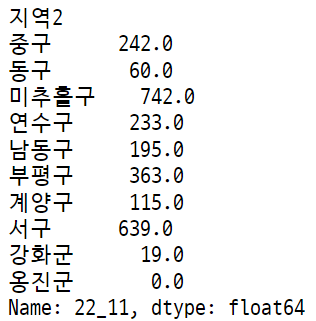

In [9]:
# [7-1] 코드 작성
sr = df2.set_index(['지역1','지역2']).loc['인천', '22_11'][1:].dropna()
sr

지역2
중구      242.0
동구       60.0
미추홀구    742.0
연수구     233.0
남동구     195.0
부평구     363.0
계양구     115.0
서구      639.0
강화군      19.0
옹진군       0.0
Name: 22_11, dtype: float64

### 7-2. 완성한 sr로 pie챠트 그리는 다음 코드를 실행하여 확인하라
- pie 챠트의  wedgeprops옵션 이해
    - 예로 wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5} 
    - width : 부채꼴 영역의 너비(반지름에 대한 비율), edgecolor : 테두리의 색상, linewidth : 테두리 선의 너비 

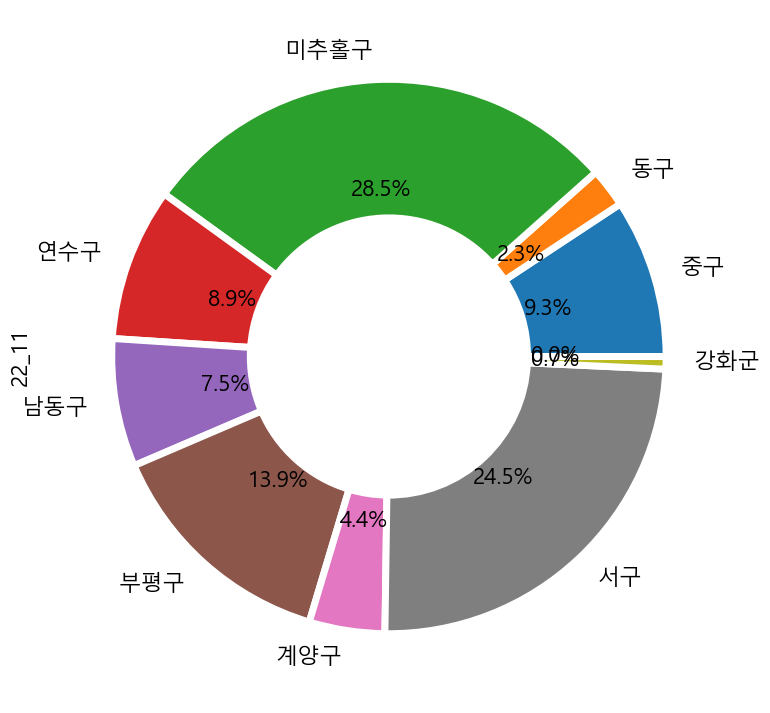

In [11]:
# [7-2] 코드 실행 : pie 차트로 시각화

wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 5} 
sr.plot(kind='pie', figsize=(9,9), autopct='%.1f%%', wedgeprops=wedgeprops);